In [1]:
# Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes do modelo
from sklearn.svm import SVC

# Funções de avaliação dos modelos
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Extraído de https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(
        X, 
        Y, 
        P, 
        colors='k',
        levels=[-1, 0, 1], 
        alpha=0.5,
        linestyles=['--', '-', '--']
    )
    
    # plot support vectors
    if plot_support:
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, 
            linewidth=1, 
            facecolors='none'
        )

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [3]:

def show_decision_region(x, y, clf, f0, f1):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
 
    plt.title(clf.__class__.__name__)
    plt.show()

In [4]:
#Carregando o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/JusciAvelino/Monitoria-ModelagemPreditivaDescritiva1/main/Breast%20Cancer%20Wisconsin%20(Diagnostic).csv')

In [5]:
X = dataset.iloc[:,1:3]
y = dataset[dataset.columns[0]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
def plot_ds():
    plt.scatter(
        X_train["radius_Mean"][class_0_instances],
        X_train["texture_Mean"][class_0_instances], 
        c=colors[class_a], 
        marker=markers[class_a]
    )
    plt.scatter(
        X_train["radius_Mean"][class_1_instances], 
        X_train["texture_Mean"][class_1_instances], 
        c=colors[class_b], 
        marker=markers[class_b]
    )

In [7]:
colors = {"M": "steelblue", "B": "darkorange"}
markers = {"M": "s", "B": "^"}

In [8]:
class_a = "M"
class_b = "B"
class_0_instances = (y == class_a)
class_1_instances = (y == class_b)

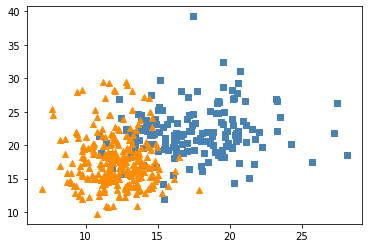

In [9]:
plot_ds()

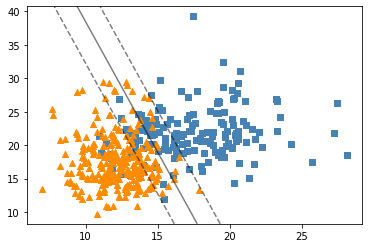

In [10]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

plot_ds()

plot_svc_decision_function(model)

In [11]:
def grid_Search(skf):
  accuracies_list = []
  fold = 0

  for train, test in skf.split(X, y):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]

        model = SVC()
        parameters = {'C':[100, 1000, 10000, 100000],
                        'kernel': ['linear', 'rbf']}
    
        grid = GridSearchCV(estimator = model,            
                    param_grid = parameters,          
                    scoring = 'accuracy',             
                    cv = 5)
        
        grid.fit(X_train, y_train)

        y_pred = grid.predict(X_test)
        
        print("Melhor parametro:", grid.best_params_)         
        print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))
        
        accuracies_list.append(accuracy_score(y_test, y_pred))
        fold += 1
    
  accuracies = np.array(accuracies_list)
  print("\nAcurácia média (desvio): %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))

grid_Search(StratifiedKFold(n_splits=5, random_state=42, shuffle=True))

Melhor parametro: {'C': 100, 'kernel': 'rbf'}
Fold 0: 0.895
Melhor parametro: {'C': 10000, 'kernel': 'rbf'}
Fold 1: 0.895
Melhor parametro: {'C': 1000, 'kernel': 'rbf'}
Fold 2: 0.833
Melhor parametro: {'C': 100000, 'kernel': 'linear'}
Fold 3: 0.886
Melhor parametro: {'C': 1000, 'kernel': 'rbf'}
Fold 4: 0.938

Acurácia média (desvio): 0.889 +- (0.033)


C = 100


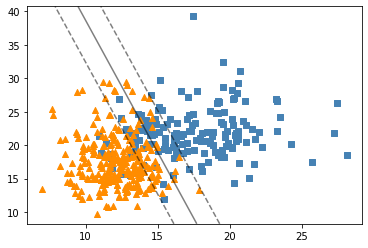

C = 1000


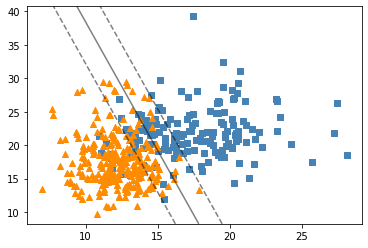

C = 10000


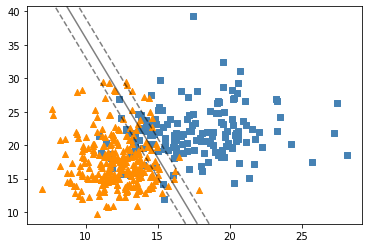

C = 100000


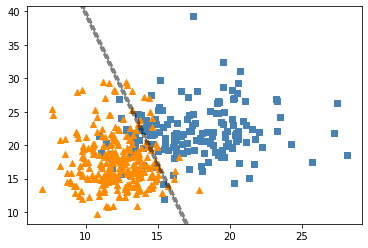

In [12]:
C = 100
for _ in range(4):
    plt.figure()
    print("C =", C)
    model = SVC(C=C, kernel="linear")
    C *= 10
    model.fit(X_train, y_train)

    plot_ds()

    plot_svc_decision_function(model)
    plt.show()

C = 100


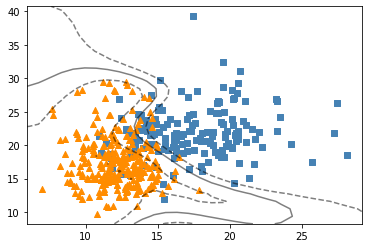

C = 1000


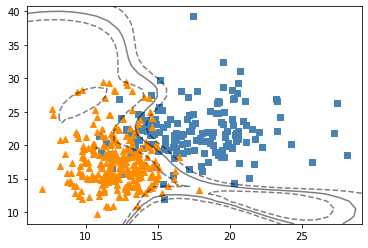

C = 10000


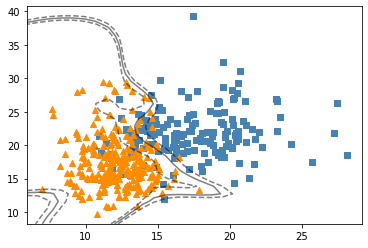

C = 100000


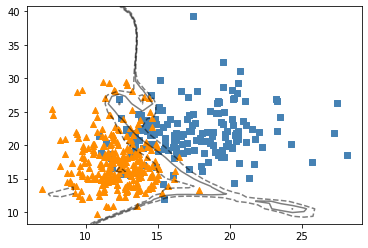

In [13]:
C = 100
for _ in range(4):
    plt.figure()
    print("C =", C)
    model = SVC(C=C, kernel="rbf")
    C *= 10
    model.fit(X_train, y_train)

    plot_ds()

    plot_svc_decision_function(model)
    plt.show()

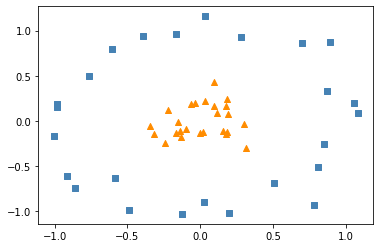

In [14]:
from sklearn.datasets import make_circles

# criação do dataset
X, y = make_circles(n_samples=50, noise=0.1, random_state=199, factor=0.2)

# cores e simbolos para as classses
colors = {0: "steelblue", 1: "darkorange", 2: "mediumseagreen"}
markers = {0: "s", 1: "^", 2:"o"}

# visualização do dataset
plt.scatter(
    X[y==0, 0],
    X[y==0, 1], 
    c=colors[0], 
    marker=markers[0]
)
plt.scatter(
    X[y==1, 0], 
    X[y==1, 1], 
    c=colors[1], 
    marker=markers[1]
)

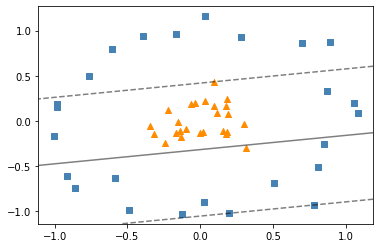

In [15]:
plt.scatter(
    X[y==0, 0],
    X[y==0, 1], 
    c=colors[0], 
    marker=markers[0]
)
plt.scatter(
    X[y==1, 0], 
    X[y==1, 1], 
    c=colors[1], 
    marker=markers[1]
)

model = SVC(C=10, kernel="linear")
model.fit(X, y)

plot_svc_decision_function(model)

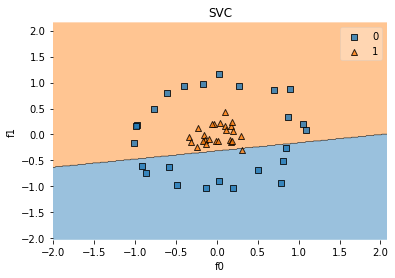

In [16]:
show_decision_region(
    X,
    y,
    model,
    "f0",
    "f1"
)

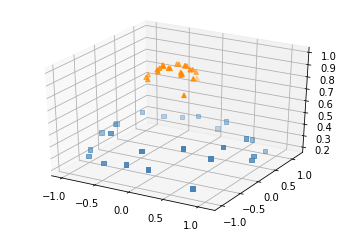

In [17]:
f = lambda x: np.exp(-(x**2).sum(1))
z = f(X) # criando uma nova dimensão

from mpl_toolkits import mplot3d

ax = plt.subplot(projection='3d')
# visualizar essa nova dimensão
ax.scatter3D(X[y==0, 0], X[y==0, 1], z[y==0], c=colors[0], marker=markers[0])
ax.scatter3D(X[y==1, 0], X[y==1, 1], z[y==1], c=colors[1], marker=markers[1])
plt.show()

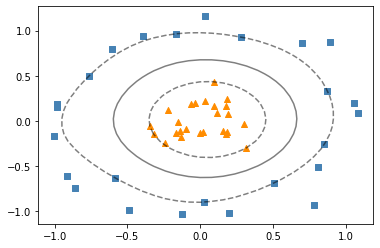

In [18]:
plt.scatter(
    X[y==0, 0],
    X[y==0, 1], 
    c=colors[0], 
    marker=markers[0]
)
plt.scatter(
    X[y==1, 0], 
    X[y==1, 1], 
    c=colors[1], 
    marker=markers[1]
)

model = SVC(C=10, kernel="rbf")
model.fit(X, y)

plot_svc_decision_function(model)

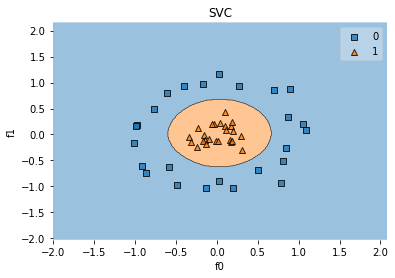

In [19]:
show_decision_region(
    X,
    y,
    model,
    "f0",
    "f1"
)